<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-14-nlp-regex/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('popular')

In [32]:
from nltk.stem import SnowballStemmer
import spacy
nlp = spacy.load('en_core_web_sm')

In [7]:
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spam.csv"
cols = ['label', 'v2', 'v3', 'v4', 'v5']
df = pd.read_csv(url, encoding = "ISO-8859-1", names=cols, skiprows=1)
df.head()

,label,v2,v3,v4,v5
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df = df.drop(['v3', 'v4', 'v5'], axis=1)

#Use your text mining skills to find spam matches
Punctuation  
Stopwords  
Stemming


In [36]:
def clean_text(df, col, col_name, stop_lang, stemming, lemma):
  stop_words = nltk.corpus.stopwords.words(stop_lang)
  stem_en = SnowballStemmer(stop_lang)

  df[col_name] = df[col] \
          .apply(lambda x: "".join([s.translate(str.maketrans('', '', string.punctuation)) for s in x]))

  df[col_name] = df[col_name].str.lower()

  df[col_name] = df[col_name] \
          .apply(lambda x: " ".join([val for val in x.split() if val not in stop_words]))

  if stemming:
      df[col_name] = df[col_name] \
          .apply(lambda x: " ".join([stem_en.stem(val) for val in x.split()]))

  if lemma:
      df[col_name] = df[col_name] \
          .apply(lambda x: " ".join([val.lemma_ for val in nlp(x)]))

In [37]:
clean_text(df=df, col='v2', col_name='v2_clean', stop_lang='english', stemming=False, lemma=True)

In [40]:
df[['v2', 'v2_clean']].sample(5)

,v2,v2_clean
3638,Wat's da model num of ur phone?,wats da model num ur phone
185,Hello handsome ! Are you finding that job ? No...,hello handsome find job lazy work towards get ...
2404,Please give it 2 or i will pick it up on Tues...,please give 2 pick tuesday evening 8 ok
1923,Hello. They are going to the village pub at 8 ...,hello go village pub 8 either come accordingly ok
2512,"Hiya , have u been paying money into my accoun...",hiya u pay money account thank get pleasant su...


#Prepare a data frame containing the variables deduced in the previous step for each observation (SMS)



In [44]:
def tfidf_to_df(corpus, grams):
  tfidf = TfidfVectorizer(ngram_range=grams)
  tfidf.fit(corpus)
  vectors = tfidf.transform(corpus)
  vectors = vectors.todense()
  return tfidf, vectors

In [45]:
model, vectors = tfidf_to_df(df['v2_clean'], grams=(1,1))

In [57]:
len(model.vocabulary_), vectors.shape, df.shape

(8451, (5572, 8451), (5572, 3))

In [54]:
X = pd.DataFrame(vectors)

#Uses the Naïve Bayes classifier to classify "spam" vs "real" SMS (Non spam)

In [91]:
y = df['label']

clean_text(df=df, col='v2', col_name='v2_clean', stop_lang='english', stemming=False, lemma=False)
model, vectors = tfidf_to_df(df['v2_clean'], grams=(1,3))
X = pd.DataFrame(vectors)
X.shape, y.shape

((5572, 72818), (5572,))

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [93]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)

#Check the predictions of your classifier using your test set (because you of course took the time to create a test set in the previous step).

train data: 0.985266541655505
test data: 0.9293094072865687
              precision    recall  f1-score   support

         ham       0.98      0.93      0.96      1592
        spam       0.68      0.89      0.77       247

    accuracy                           0.93      1839
   macro avg       0.83      0.91      0.87      1839
weighted avg       0.94      0.93      0.93      1839



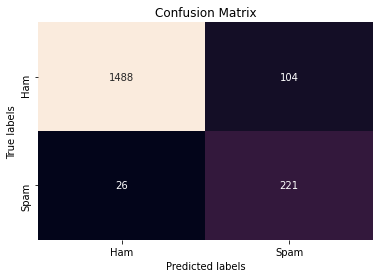

In [94]:
print("train data:",gnb_model.score(X_train, y_train))
print("test data:",gnb_model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d', cbar=False) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Ham', 'Spam']); ax.yaxis.set_ticklabels(['Ham', 'Spam'])

print(classification_report(y_test, y_pred))

In [95]:
y_test.value_counts()

ham     1592
spam     247
Name: label, dtype: int64